In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_rows',None)

In [11]:
df=pd.read_csv('train.csv')

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
features_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


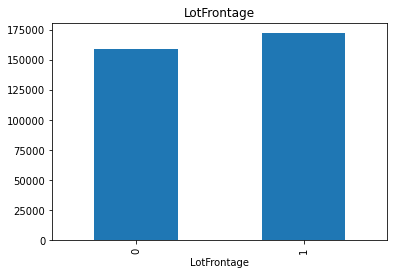

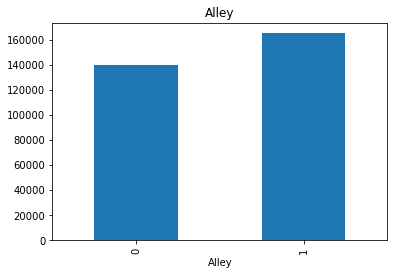

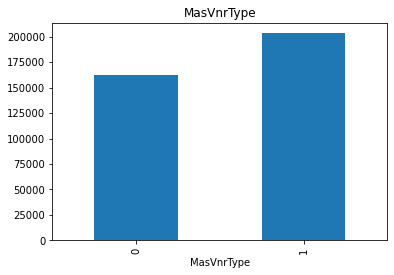

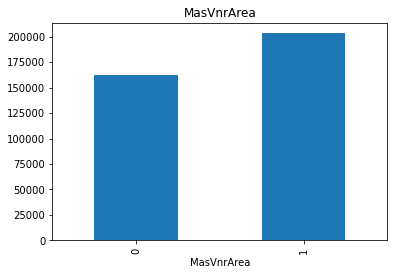

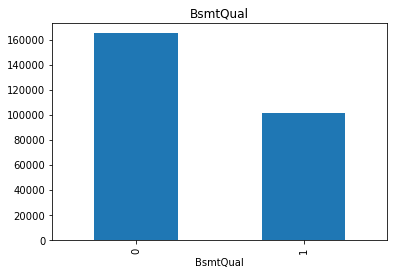

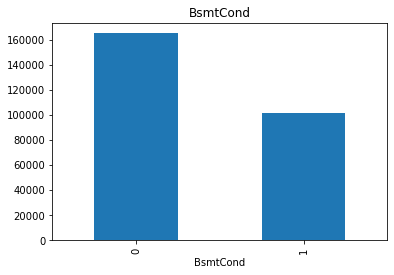

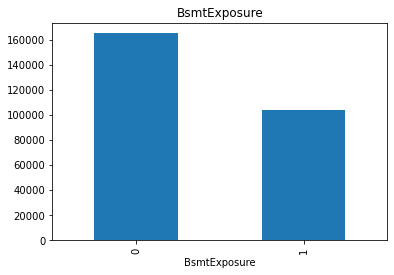

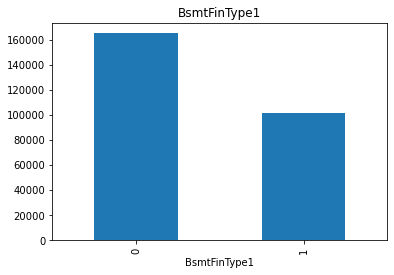

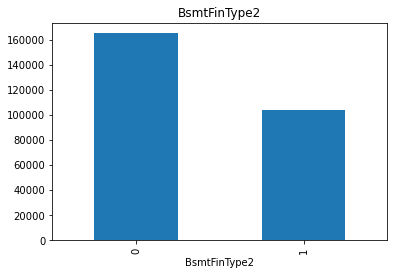

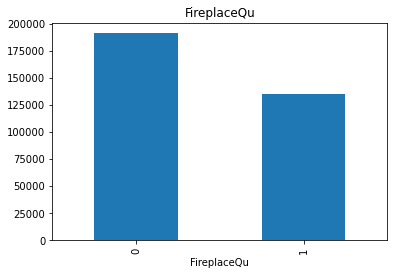

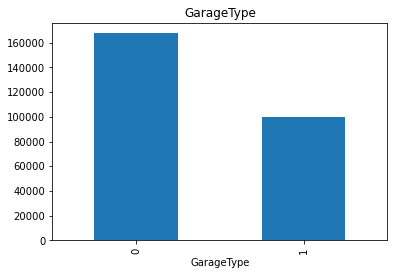

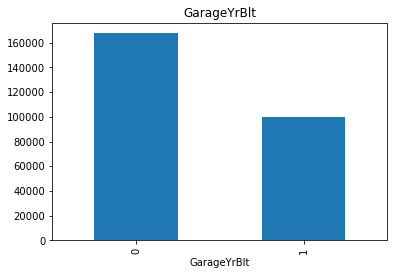

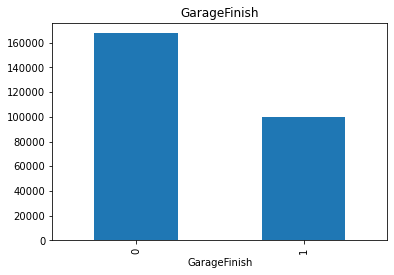

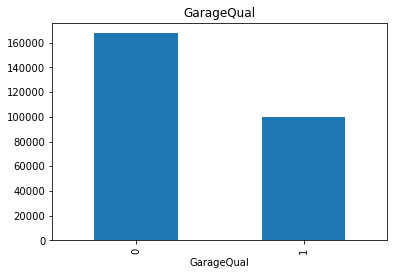

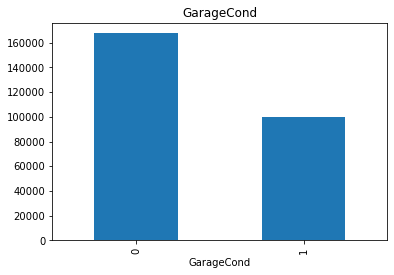

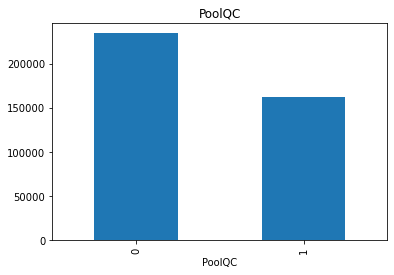

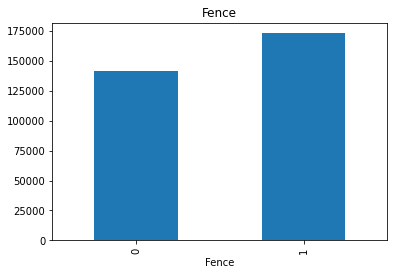

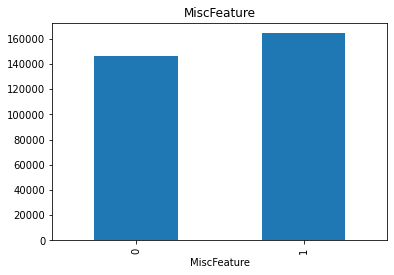

In [17]:
for feature in features_na:
    dfnew = df.copy()
    dfnew[feature] = np.where(dfnew[feature].isnull(),1,0 )

    dfnew.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Numerical variables

In [19]:
numerical = [features for features in df.columns if df[features].dtypes != "O"]
print(len(numerical))
df[numerical].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [30]:
year_variables = [features for features in numerical if 'Yr' in features or 'Year' in features]
year_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [39]:
print('YrSold',df['YrSold'].unique())

YrSold [2008 2007 2006 2009 2010]


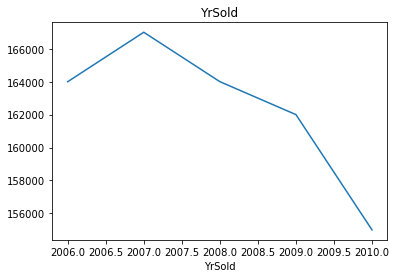

In [36]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('YrSold')
plt.show()

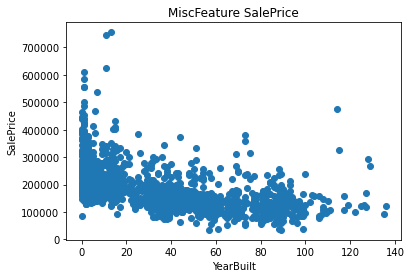

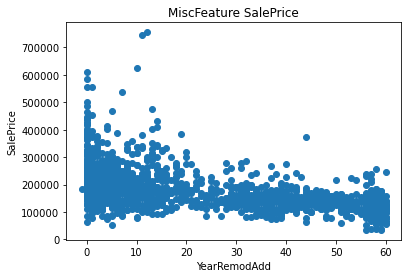

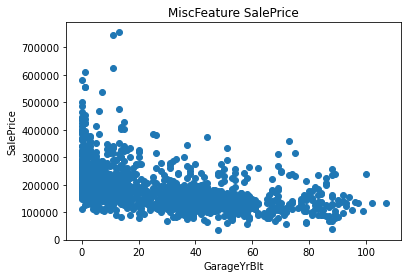

In [43]:
for year in year_variables:
    if year != 'YrSold':
        data = df.copy()
        data[year] = data['YrSold'] - data[year]
        plt.scatter(data[year],data['SalePrice'])
        plt.xlabel(year)
        plt.ylabel('SalePrice')
        plt.title(feature+' SalePrice')
        plt.show()

### Discrete variables

In [70]:
discrete_feature = [features for features in numerical if len(df[features].unique())<25 and (features not in year_variables + ['Id'])]
print(len(discrete_feature))

17


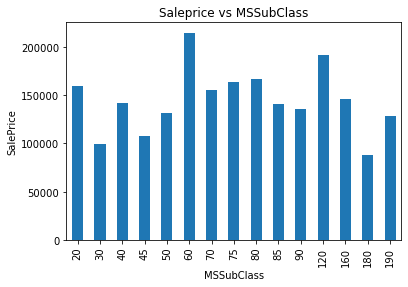

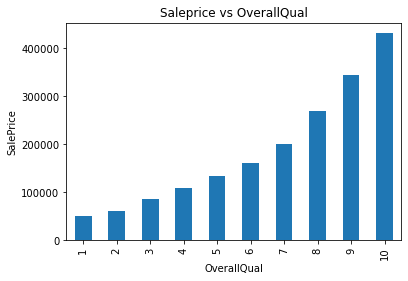

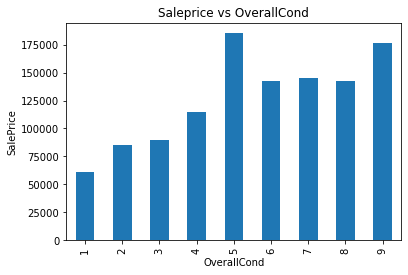

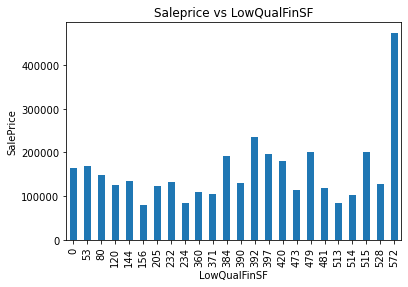

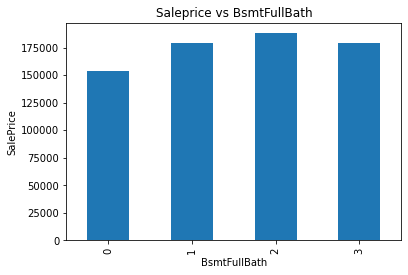

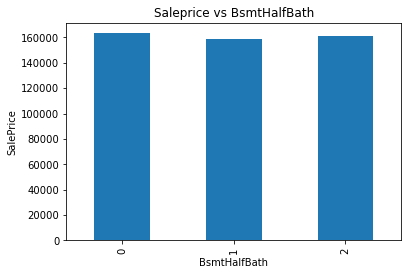

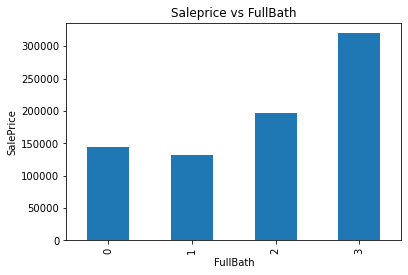

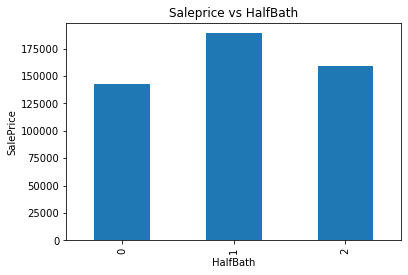

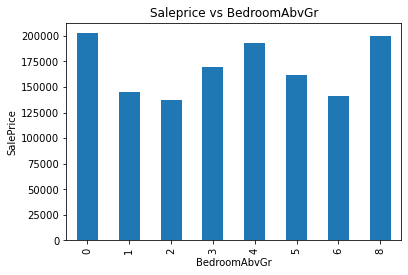

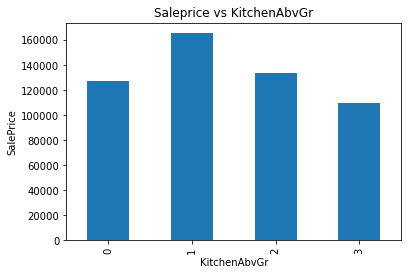

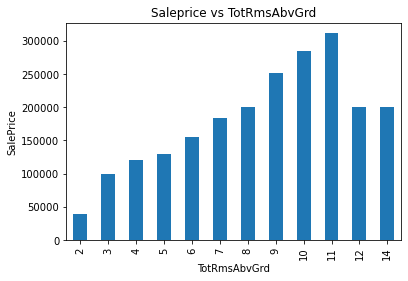

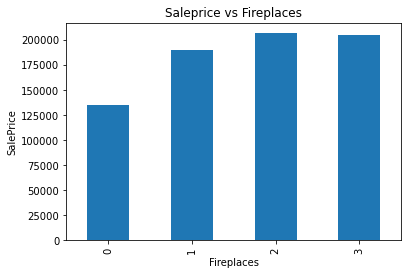

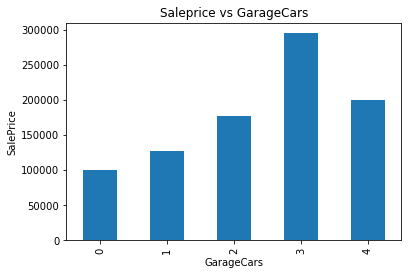

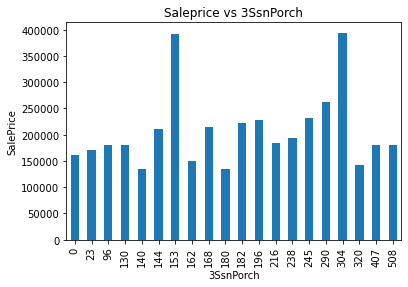

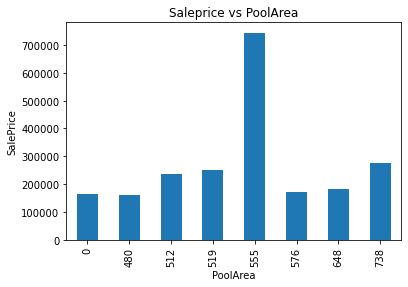

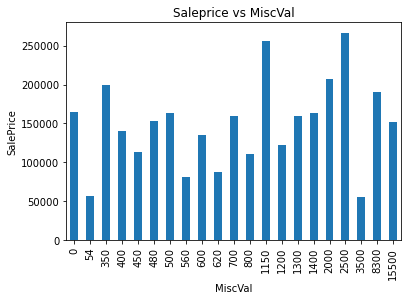

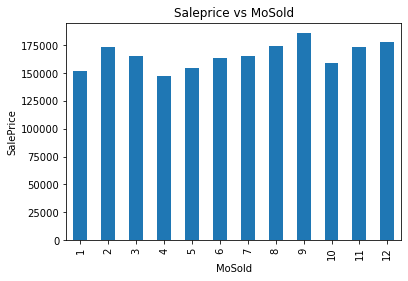

In [58]:
for i in discrete_feature:
    data = df.copy()
    
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title('Saleprice vs '+i )
    plt.show()

### Continuous features

In [69]:
cont_features = [features for features in numerical if features not in discrete_feature + year_variables + ['Id']]
len(cont_features)

16

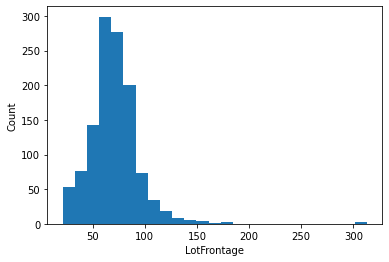

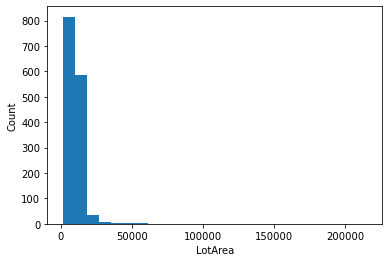

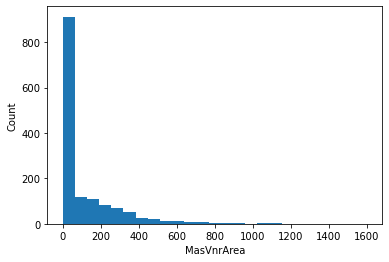

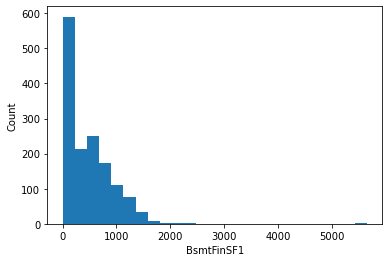

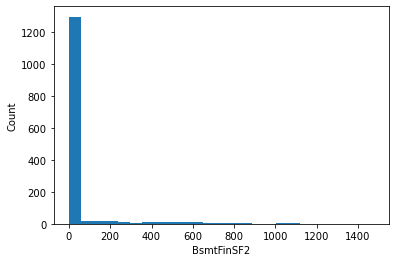

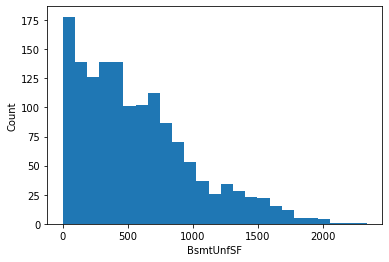

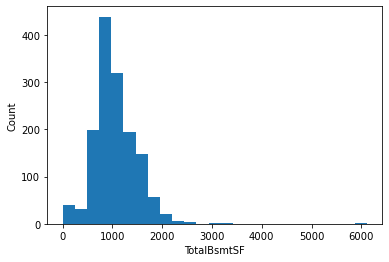

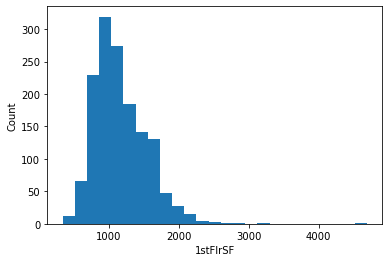

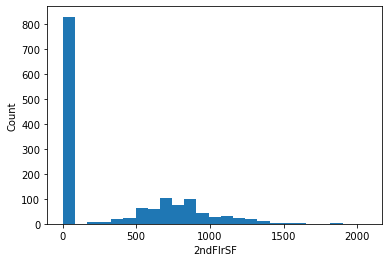

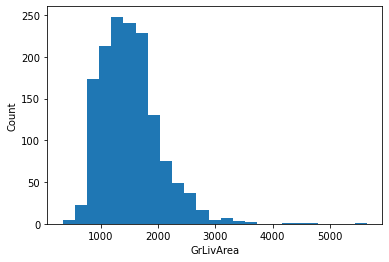

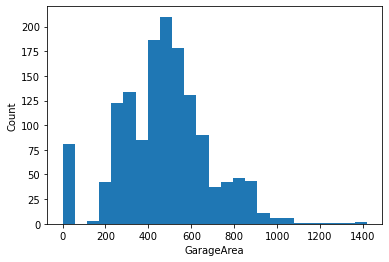

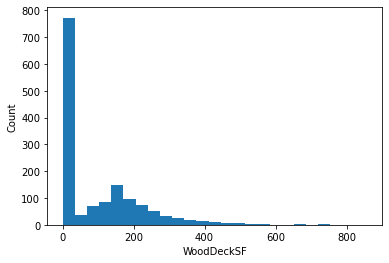

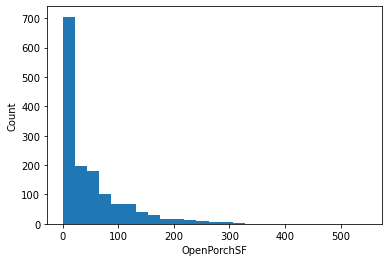

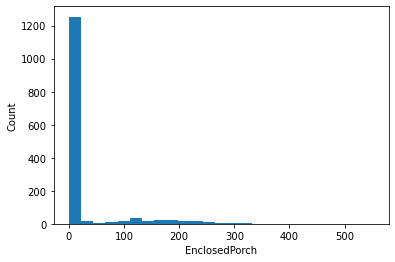

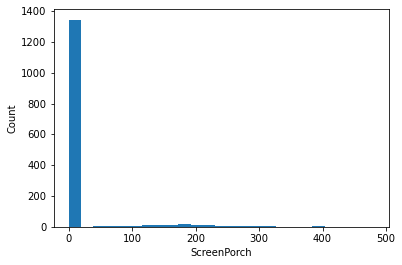

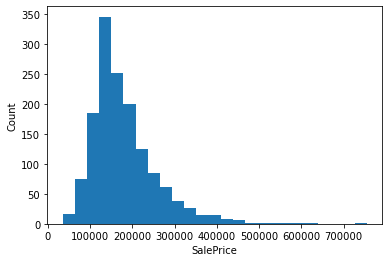

In [71]:
c
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

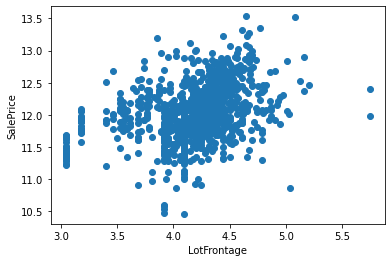

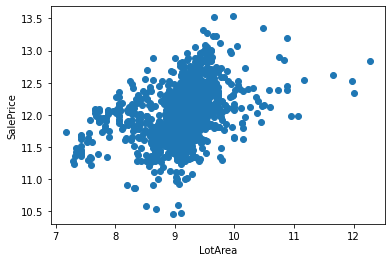

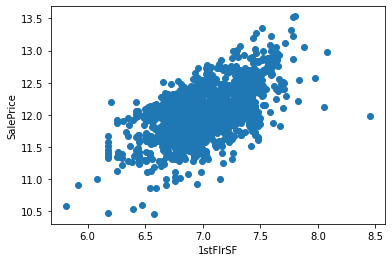

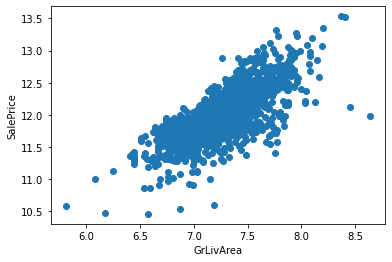

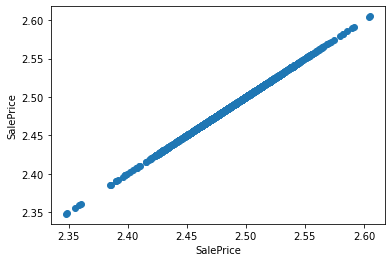

In [77]:
for i in cont_features:
    data = df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i] = np.log(data[i])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

## Outliers

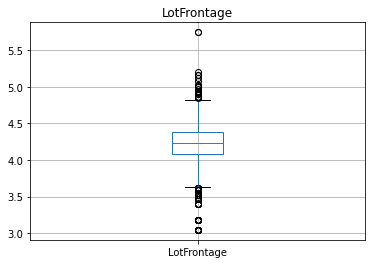

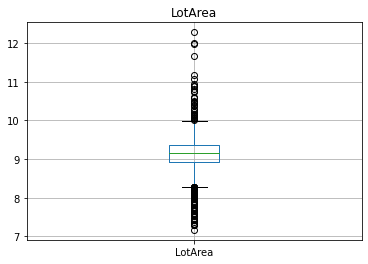

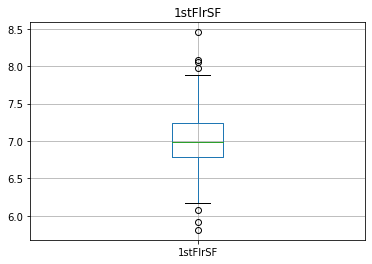

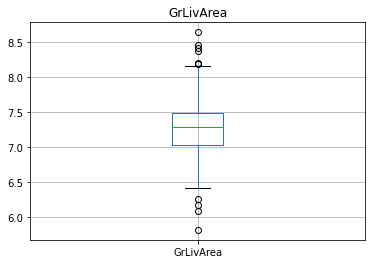

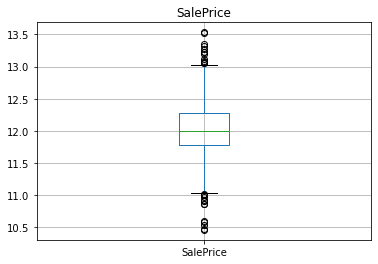

In [79]:
for i in cont_features:
    data = df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i] = np.log(data[i])
        data.boxplot(column = i)
        plt.title(i)
        plt.show()

## Categorical variables

In [82]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(len(categorical))

43


In [83]:
for i in categorical:
    print("Feature {} has {} unique values".format(i,len(df[i].unique())))

Feature MSZoning has 5 unique values
Feature Street has 2 unique values
Feature Alley has 3 unique values
Feature LotShape has 4 unique values
Feature LandContour has 4 unique values
Feature Utilities has 2 unique values
Feature LotConfig has 5 unique values
Feature LandSlope has 3 unique values
Feature Neighborhood has 25 unique values
Feature Condition1 has 9 unique values
Feature Condition2 has 8 unique values
Feature BldgType has 5 unique values
Feature HouseStyle has 8 unique values
Feature RoofStyle has 6 unique values
Feature RoofMatl has 8 unique values
Feature Exterior1st has 15 unique values
Feature Exterior2nd has 16 unique values
Feature MasVnrType has 5 unique values
Feature ExterQual has 4 unique values
Feature ExterCond has 5 unique values
Feature Foundation has 6 unique values
Feature BsmtQual has 5 unique values
Feature BsmtCond has 5 unique values
Feature BsmtExposure has 5 unique values
Feature BsmtFinType1 has 7 unique values
Feature BsmtFinType2 has 7 unique values

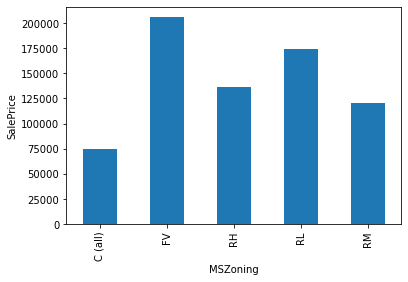

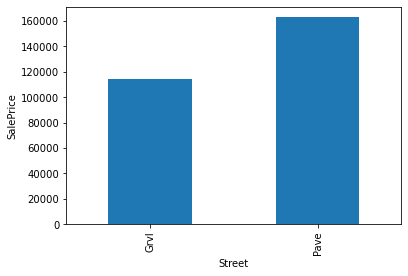

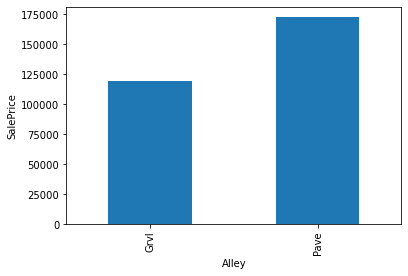

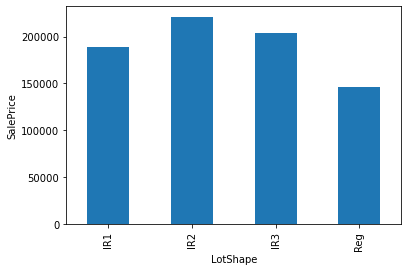

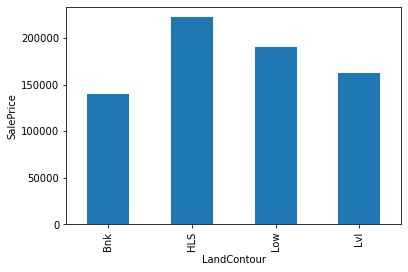

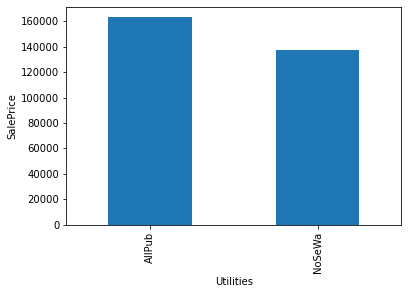

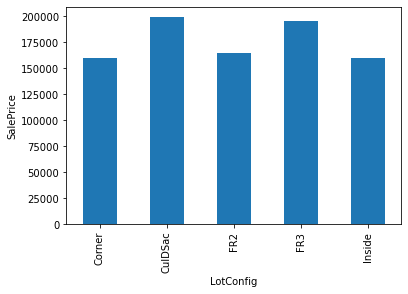

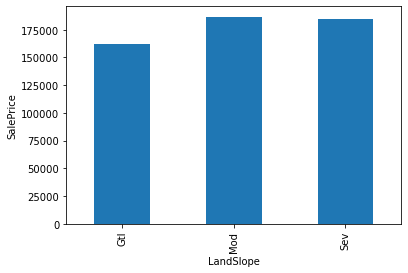

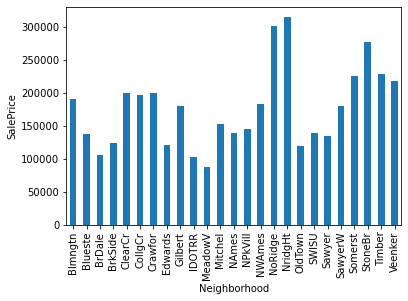

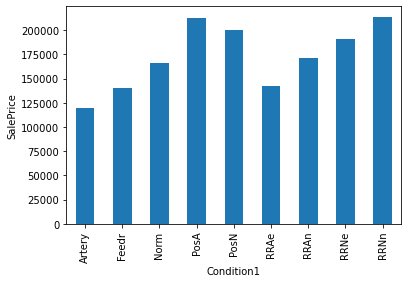

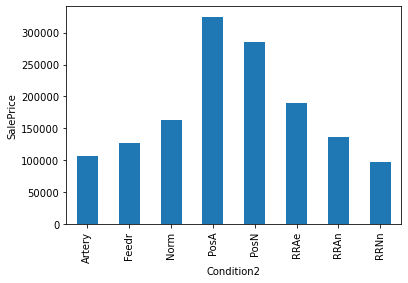

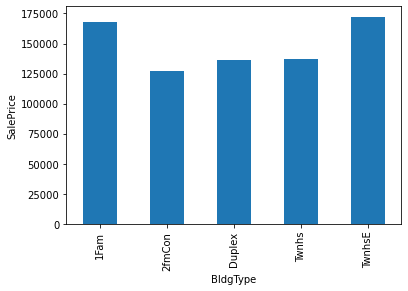

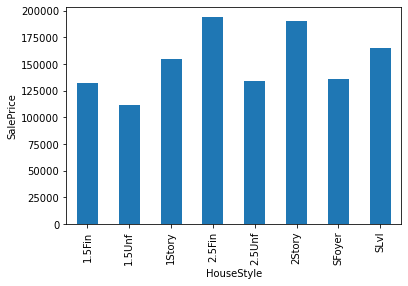

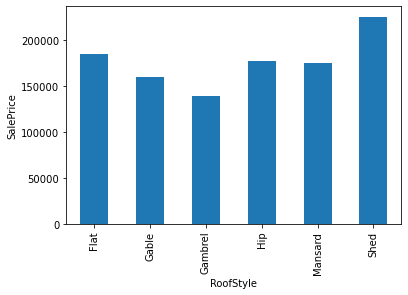

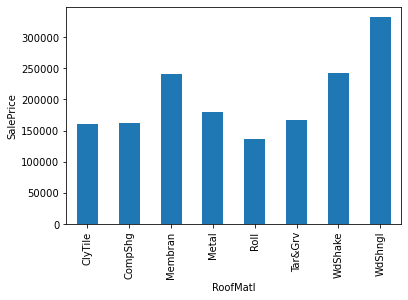

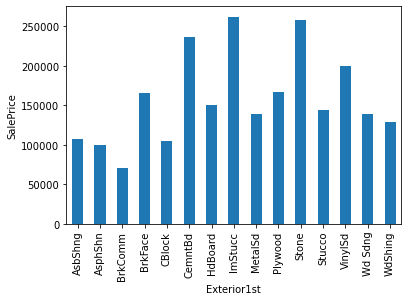

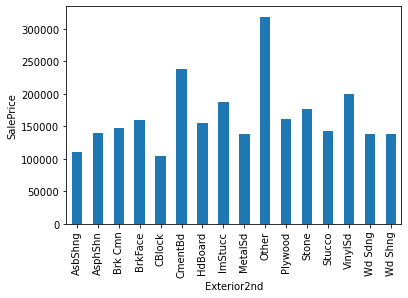

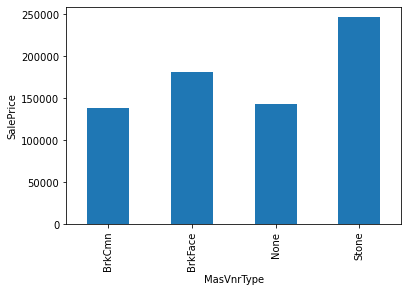

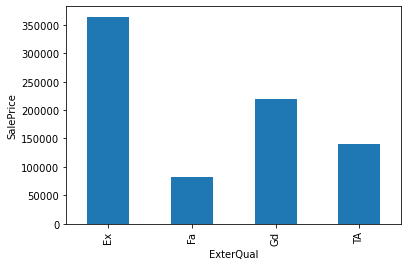

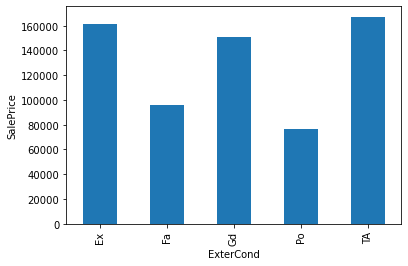

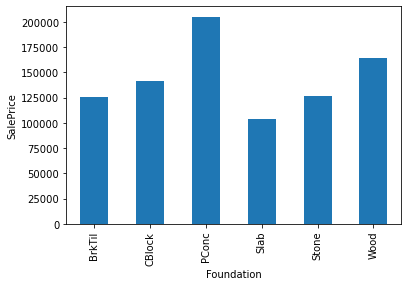

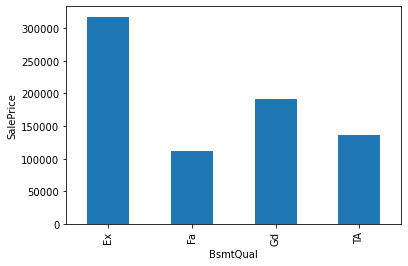

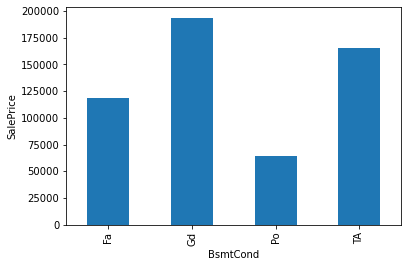

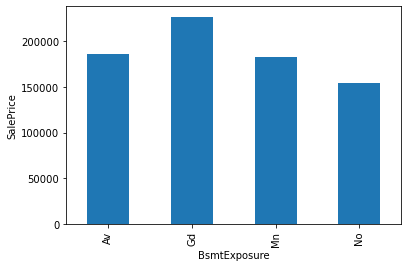

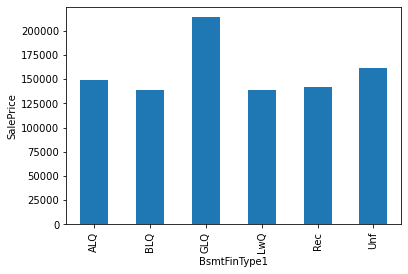

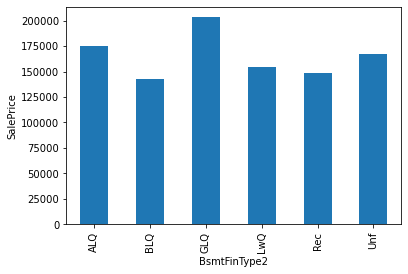

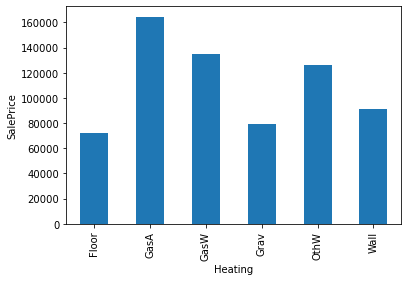

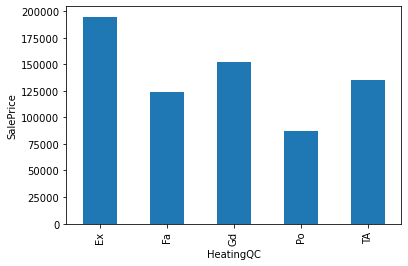

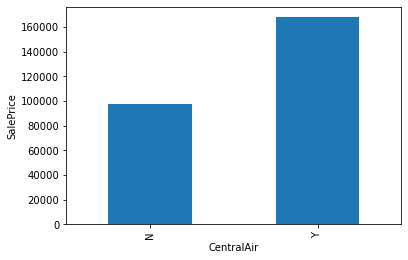

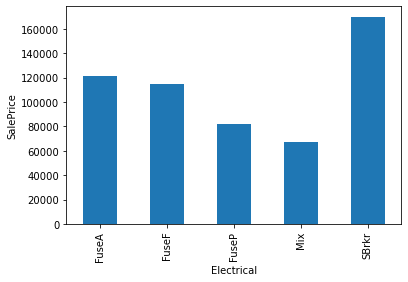

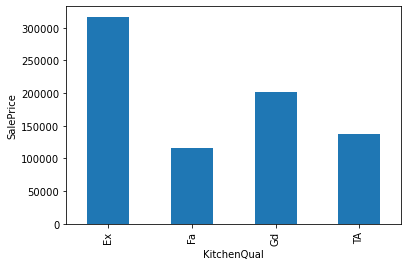

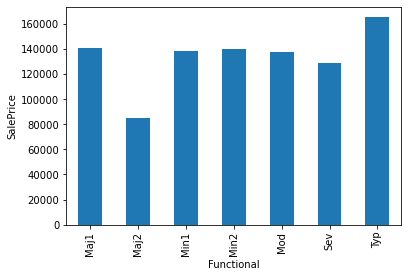

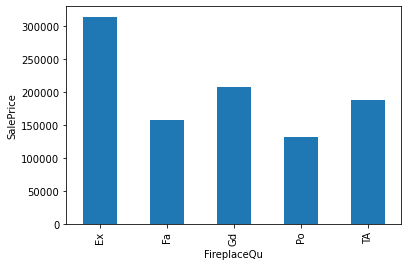

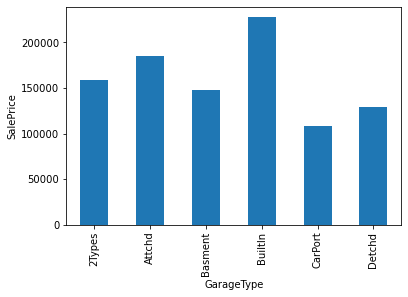

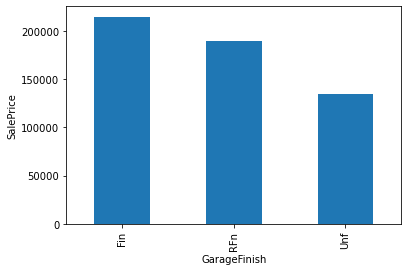

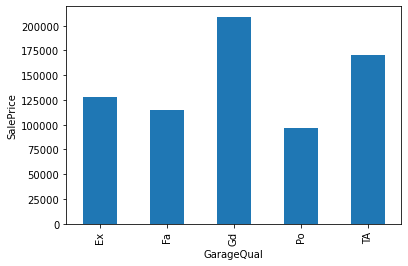

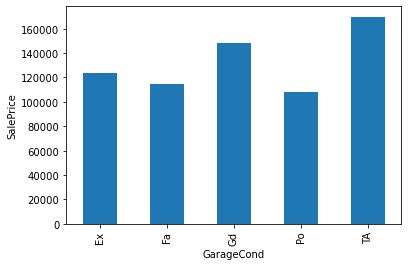

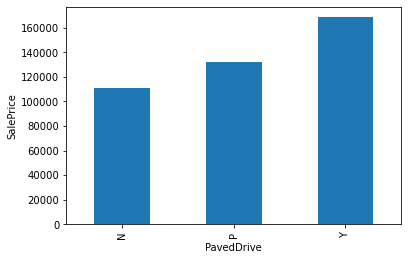

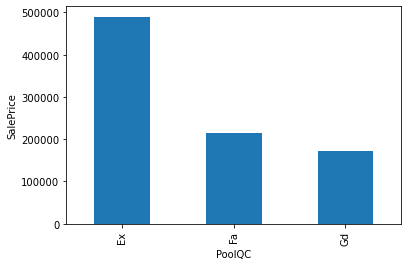

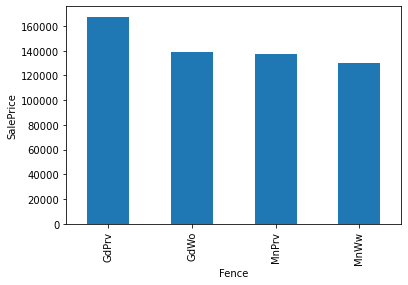

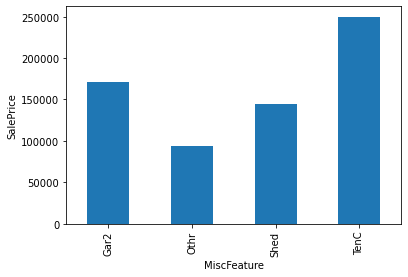

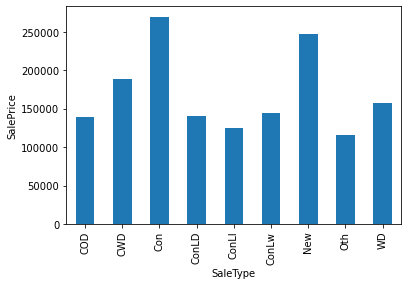

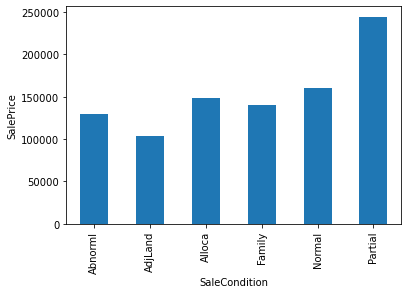

In [84]:
for i in categorical:
    data = df.copy()
    
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

In [5]:
dfnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

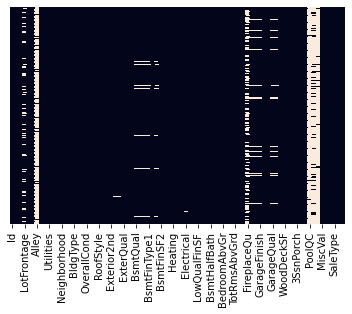

In [6]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [25]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [18]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [29]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [23]:
df.drop('Alley',axis = 1,inplace = True)

In [24]:
df.shape

(1460, 80)